# Learning Opencv

利用 [xeus-cling](https://github.com/jupyter-xeus/xeus-cling)，我们在 jupyter notebook 里写起了 C++。
用于显示图片和载入 OpenCV 的代码，放在了 `util.h` 中。

In [1]:
#include "util.h"

测试图片（[Lena 的完整故事](http://www.ee.cityu.edu.hk/~lmpo/lenna/Lenna97.html), [完整图片](http://www.ee.cityu.edu.hk/~lmpo/lenna/len_full.jpg)）：

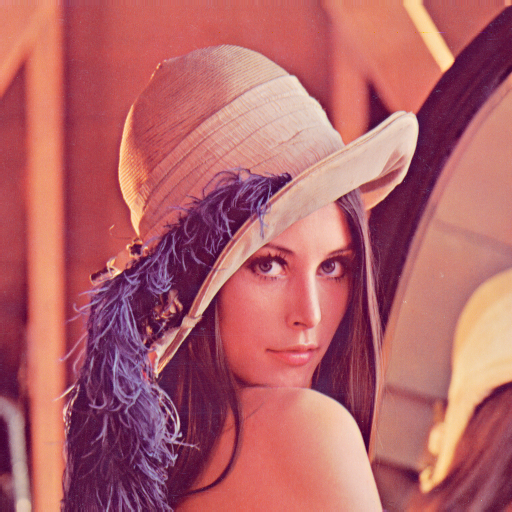

In [2]:
auto original = cv::imread("lenna.png");
im::show(original)

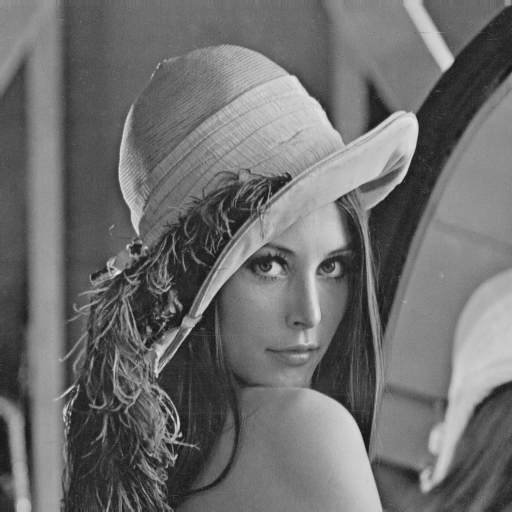

In [3]:
cv::Mat gray;
cv::cvtColor(original, gray, cv::COLOR_RGB2GRAY);
im::show(gray)

In [4]:
cv::Mat img;

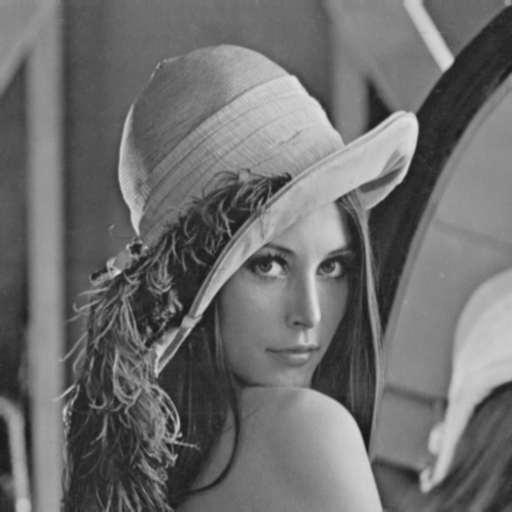

In [5]:
cv::Mat blur;
cv::GaussianBlur(gray, blur, cv::Size(3, 3), 0, 0, cv::BORDER_DEFAULT);
im::show(blur)

## Chapter 10. Filters and Convolution
### Derivatives and Gradients

**The Sobel Derivative**

算个近似的梯度，起到边缘检测的效果。

```c++
void cv::Sobel (
        InputArray  	src,
		OutputArray  	dst,
		int  	ddepth,
		int  	dx,
		int  	dy,
		int  	ksize = 3,
		double  	scale = 1,
		double  	delta = 0,
		int  	borderType = BORDER_DEFAULT 
)
```

| parameter | description |
| ---------- | ------------------------------------------------------------ |
| src        | input image.                                                 |
| dst        | output image of the same size and the same number of channels as src . |
| ddepth     | output image depth, see [combinations](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#filter_depths); in the case of 8-bit input images it will result in truncated derivatives. |
| dx         | order of the derivative x.                                   |
| dy         | order of the derivative y.                                   |
| ksize      | size of the extended Sobel kernel; it must be 1, 3, 5, or 7. |
| scale      | optional scale factor for the computed derivative values; by default, no scaling is applied (see [getDerivKernels](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga6d6c23f7bd3f5836c31cfae994fc4aea) for details). |
| delta      | optional delta value that is added to the results prior to storing them in dst. |
| borderType | pixel extrapolation method, see [BorderTypes](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5). [BORDER_WRAP](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5a697c1b011884a7c2bdc0e5caf7955661) is not supported. |


Reference:
* Tutorial: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
* Manual: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d


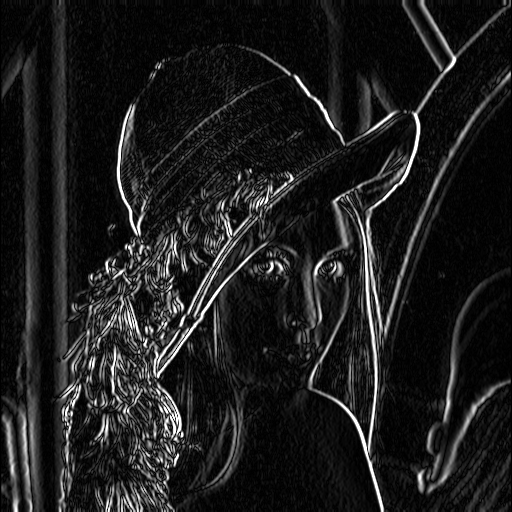

In [6]:
cv::Mat grad_x;
cv::Sobel(blur, grad_x, CV_16S, 1, 0, 3, 1, 0);
convertScaleAbs(grad_x, grad_x);
im::show(grad_x)

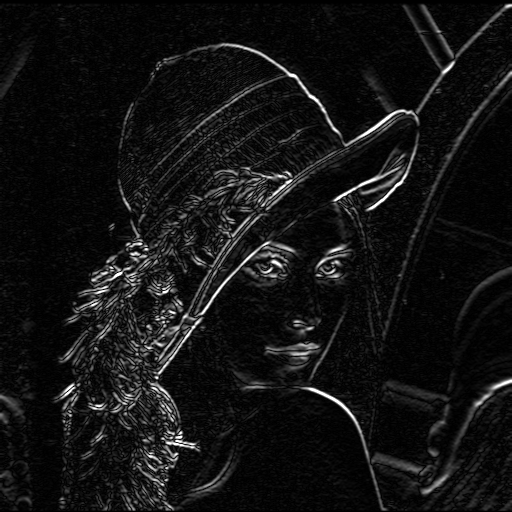

In [7]:
cv::Mat grad_y;
cv::Sobel(blur, grad_y, CV_16S, 0, 1, 3, 1, 0);
convertScaleAbs(grad_y, grad_y);
im::show(grad_y)

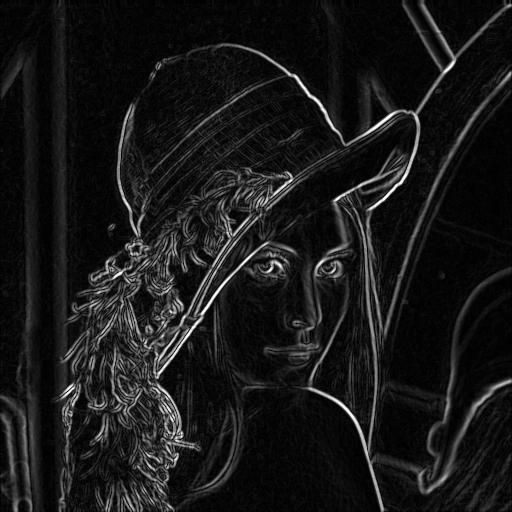

In [8]:
cv::Mat grad;
cv::addWeighted(grad_x, 0.5, grad_y, 0.5, 0, grad);
im::show(grad)

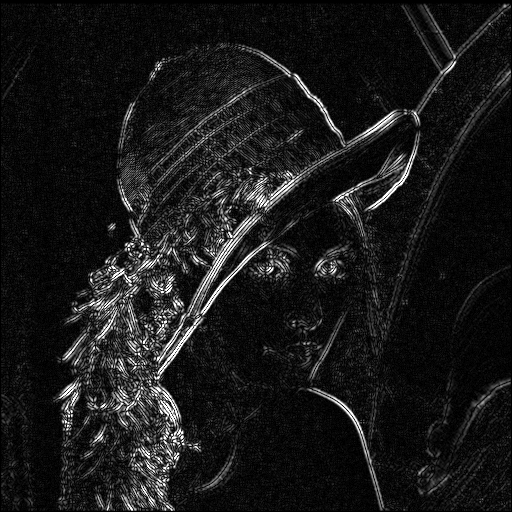

In [9]:
cv::Sobel(blur, grad, CV_16S, 1, 1, 3, 5, 0);
convertScaleAbs(grad, grad);
im::show(grad)

**Scharr Filter**

Sobel 算子的 kernel size 为 3 时的一种改进。

```c++
void cv::Scharr (
        InputArray  	src,
		OutputArray  	dst,
		int  	ddepth,
		int  	dx,
		int  	dy,
		double  	scale = 1,
		double  	delta = 0,
        int  	borderType = BORDER_DEFAULT 
)
```

| parameter | description |
| ---------- | ------------------------------------------------------------ |
| src        | input image.                                                 |
| dst        | output image of the same size and the same number of channels as src. |
| ddepth     | output image depth, see [combinations](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#filter_depths) |
| dx         | order of the derivative x.                                   |
| dy         | order of the derivative y.                                   |
| scale      | optional scale factor for the computed derivative values; by default, no scaling is applied (see [getDerivKernels](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga6d6c23f7bd3f5836c31cfae994fc4aea) for details). |
| delta      | optional delta value that is added to the results prior to storing them in dst. |
| borderType | pixel extrapolation method, see [BorderTypes](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5). [BORDER_WRAP](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5a697c1b011884a7c2bdc0e5caf7955661) is not supported. |

Referene:
* Manual: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaa13106761eedf14798f37aa2d60404c9

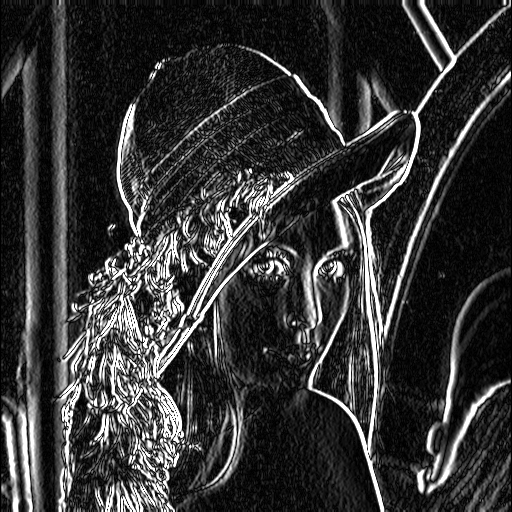

In [10]:
cv::Scharr(blur, img, CV_16S, 1, 0, 0.5, 0);
convertScaleAbs(img, img);
im::show(img)

**The Laplacian**

算二阶导（类似二阶 Sobel 算子）。

Reference:
* Tutorial: https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
* Manual: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6

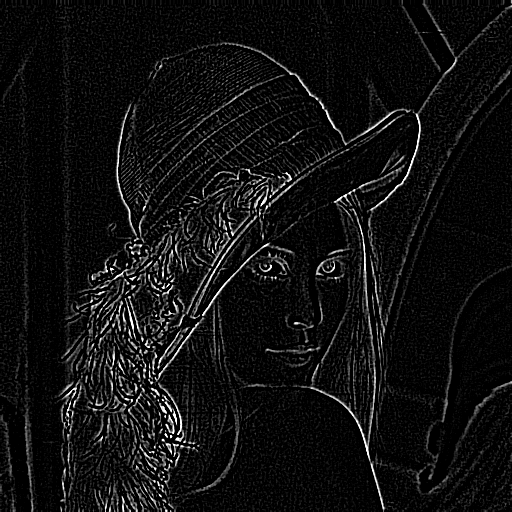

In [11]:
cv::Laplacian(blur, img, CV_16S, 3, 2, 0);
im::show(img)

### Image Morphology

In [12]:
int erosion_size, dilation_size;
cv::Mat element;

**Erosion**

侵蚀亮的区域。

Reference:
* Tutorial: https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
* Manual: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb

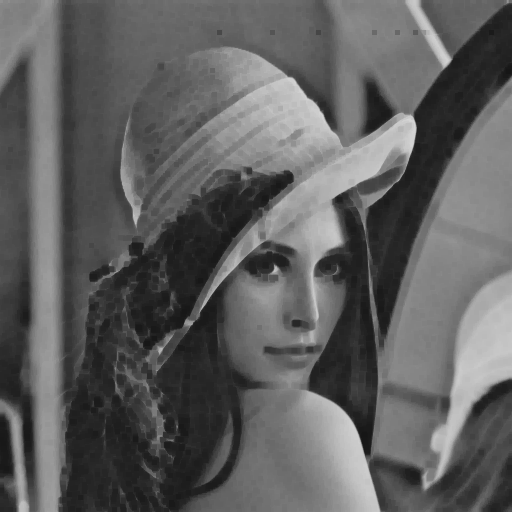

In [13]:
erosion_size = 2;
element = cv::getStructuringElement(cv::MORPH_RECT,
                                    cv::Size(2 * erosion_size + 1, 2 * erosion_size + 1),
                                    cv::Point(erosion_size, erosion_size));
cv::erode(gray, img, element);
im::show(img)

**Dilation**

扩大亮的区域。

Reference:
* Tutorial: https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
* Manual: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c

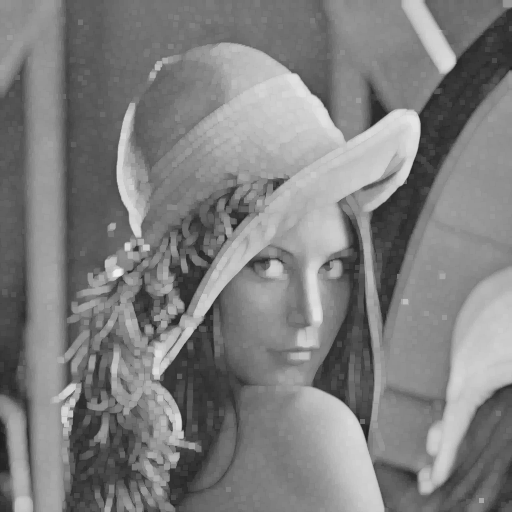

In [14]:
dilation_size = 2;
element = cv::getStructuringElement(cv::MORPH_RECT,
                                    cv::Size(2 * dilation_size + 1, 2 * dilation_size + 1),
                                    cv::Point(dilation_size, dilation_size));
cv::dilate(gray, img, element);
im::show(img)

**More Morphology**

Click https://docs.opencv.org/3.4/d3/dbe/tutorial_opening_closing_hats.html

**Convolution with Arbitary Linear Filter**

Use `filter2d`.

Reference: https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html